<a href="https://colab.research.google.com/github/SudabathulaTejaswi/FakeNewsDetection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FAKE NEWS DETECTION

In [ ]:
!pip install pandas

In [ ]:
#import basic libraries
import pandas as pd
import numpy as np
import itertools


In [ ]:
import pandas as pd
df = pd.read_csv('News.csv')


In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.shape

(6335, 4)

In [ ]:
df.isnull().sum()  #how much data is missing in our dataset : For considered we dont have any missing data

NameError: name 'df' is not defined

In [ ]:
labels=df.label #here label is the output column which we should predicate so we should extract that to the variables

In [ ]:
labels.head() #head will give us the starting 5 values

,label
0,FAKE
1,FAKE
2,REAL
3,FAKE
4,REAL


In [ ]:
from sklearn.model_selection import train_test_split # we used this module to split the data into two parts training data and testing data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df["text"],labels,test_size=0.2,random_state=20) # heare the function takes two colums text column and label coumn how much we should split

In [ ]:
x_train.head()

,text
4741,"NAIROBI, Kenya — President Obama spoke out Sun..."
2089,"Killing Obama administration rules, dismantlin..."
4074,"Dean Obeidallah, a former attorney, is the hos..."
5376,WashingtonsBlog \nCNN’s Jake Tapper hit the ...
6028,Some of the biggest issues facing America this...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
# initilize the TfidVectorizer
vector = TfidfVectorizer(stop_words='english',max_df=0.7)

#fit and transform on the training data
tf_train=vector.fit_transform(x_train)

#only transform the testing data using the vocabulary learned from the training data
tf_test = vector.transform(x_test)

# initilize the PassiveAggressiveClassifer
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train,y_train)

from sklearn.metrics import accuracy_score,pair_confusion_matrix
y_pred = pac.predict(tf_test)
score = accuracy_score(y_test,y_pred)

In [ ]:
print(f"ACCURACY : {round(score*100,2)}%")

ACCURACY : 94.63%


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
# Get unique labels from y_test
unique_labels = y_test.unique()

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_labels)

# Print the confusion matrix (optional)
print(conf_matrix)

[[621  27]
 [ 41 578]]


<Axes: >

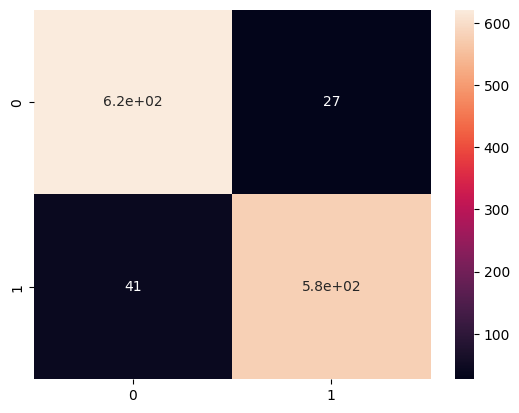

In [ ]:
import seaborn as sns
sns.heatmap(conf_matrix,annot=True)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.94      0.96      0.95       648
        REAL       0.96      0.93      0.94       619

    accuracy                           0.95      1267
   macro avg       0.95      0.95      0.95      1267
weighted avg       0.95      0.95      0.95      1267



In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(pac,open(filename,'wb'))

In [ ]:
# Save the vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vector, f)